In [74]:
#Project Summary: Analyzing Philadelphia City Employee Earnings Using NumPy, Pandas, and Python Visualization Tools

#Overview
#This project focuses on exploring the "City Employee Earnings" dataset from the City of Philadelphia, which contains 
# quarterly earnings data for city employees, including elected officials and court staff. 
# The data spans from 2019 to the most recent quarter of the current year and includes details such as base salaries, 
# overtime pay, additional earnings, job titles, departments, unions, and employment types 
# (e.g., full-time, part-time, civil service, or exempt). Note that blank base salary values typically 
# indicate part-time, temporary, or seasonal roles paid hourly, and the dataset is for informational purposes 
# only—not reflective of current salaries or total budgets. The goal is to perform data analysis and visualization 
# to uncover insights into compensation patterns, workforce trends, and potential disparities, using Python libraries 
# like NumPy for numerical operations, Pandas for data handling, and visualization tools such as Matplotlib or Seaborn.

#Objectives

#Examine salary distributions and identify high-earning roles or departments.
#Analyze trends in total earnings, overtime, and workforce size over time (e.g., quarterly or yearly changes).
#Investigate factors like union representation, job categories, and employment status to highlight variations in pay.
#Generate visualizations to make findings accessible and actionable for stakeholders, such as policymakers or researchers.

#Data Source and Preparation


#Source: The dataset is publicly available via the U.S. government's data catalog and Philadelphia's open data portal. 
# Download the latest CSV file from resources like https://catalog.data.gov/dataset/city-employee-earnings

In [5]:
#! python get-pip.py

In [2]:
#pip install pandas

In [3]:
#pip install matplotlib

In [4]:
#pip install numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = pd.read_csv("C:/Users/Johnson.Koshy/Downloads/employee_earnings.csv")

In [3]:
#information about the data
data_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775544 entries, 0 to 775543
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cartodb_id                     775544 non-null  int64  
 1   objectid                       775544 non-null  int64  
 2   calendar_year                  775544 non-null  int64  
 3   quarter                        775544 non-null  int64  
 4   last_name                      775544 non-null  object 
 5   first_name                     775544 non-null  object 
 6   title                          775544 non-null  object 
 7   job_code                       775544 non-null  object 
 8   department_name                775544 non-null  object 
 9   department_number              775544 non-null  int64  
 10  base_salary                    737018 non-null  float64
 11  salary_type                    775538 non-null  object 
 12  overtime_gross_pay_qtd        

In [4]:
#total number of null
data_file.isnull().sum()

cartodb_id                            0
objectid                              0
calendar_year                         0
quarter                               0
last_name                             0
first_name                            0
title                                 0
job_code                              0
department_name                       0
department_number                     0
base_salary                       38526
salary_type                           6
overtime_gross_pay_qtd           378687
base_gross_pay_qtd                    0
longevity_gross_pay_qtd          273780
post_separation_gross_pay_qtd    764083
miscellaneous_gross_pay_qtd           0
employee_category                     0
compulsory_union_code                64
termination_month                735728
termination_year                 735728
public_id                             0
dtype: int64

In [10]:
#making a copy of data_file

raw_df = data_file.copy()

In [11]:
#print the table to check
print(data_file)

        the_geom  cartodb_id  the_geom_webmercator  objectid  calendar_year  \
0            NaN           1                   NaN   2197027           2023   
1            NaN           2                   NaN   2197028           2022   
2            NaN           3                   NaN   2197029           2022   
3            NaN           4                   NaN   2197030           2019   
4            NaN           5                   NaN   2197031           2022   
...          ...         ...                   ...       ...            ...   
775539       NaN      775540                   NaN   2972566           2024   
775540       NaN      775541                   NaN   2972567           2024   
775541       NaN      775542                   NaN   2972568           2025   
775542       NaN      775543                   NaN   2972569           2024   
775543       NaN      775544                   NaN   2972570           2025   

        quarter  last_name first_name  \
0         

In [12]:
#Initial Look

#Shape
print(data_file.shape)

#Datatypes
print(data_file.dtypes)

(775544, 24)
the_geom                         float64
cartodb_id                         int64
the_geom_webmercator             float64
objectid                           int64
calendar_year                      int64
quarter                            int64
last_name                         object
first_name                        object
title                             object
job_code                          object
department_name                   object
department_number                  int64
base_salary                      float64
salary_type                       object
overtime_gross_pay_qtd           float64
base_gross_pay_qtd               float64
longevity_gross_pay_qtd          float64
post_separation_gross_pay_qtd    float64
miscellaneous_gross_pay_qtd      float64
employee_category                 object
compulsory_union_code             object
termination_month                float64
termination_year                 float64
public_id                          int64
dty

In [13]:
#First 10 rows
df_head = data_file.head(10)
print(df_head)

   the_geom  cartodb_id  the_geom_webmercator  objectid  calendar_year  \
0       NaN           1                   NaN   2197027           2023   
1       NaN           2                   NaN   2197028           2022   
2       NaN           3                   NaN   2197029           2022   
3       NaN           4                   NaN   2197030           2019   
4       NaN           5                   NaN   2197031           2022   
5       NaN           6                   NaN   2197032           2022   
6       NaN           7                   NaN   2197033           2022   
7       NaN           8                   NaN   2197034           2019   
8       NaN           9                   NaN   2197035           2025   
9       NaN          10                   NaN   2197036           2019   

   quarter   last_name first_name                       title job_code  ...  \
0        4       Guess      Monte      Deputy Sheriff Captain     6K06  ...   
1        4    Massi Jr     

In [14]:
#Last 10 rows
df_tail = data_file.tail(10)
print(df_tail)

        the_geom  cartodb_id  the_geom_webmercator  objectid  calendar_year  \
775534       NaN      775535                   NaN   2972561           2024   
775535       NaN      775536                   NaN   2972562           2024   
775536       NaN      775537                   NaN   2972563           2023   
775537       NaN      775538                   NaN   2972564           2024   
775538       NaN      775539                   NaN   2972565           2024   
775539       NaN      775540                   NaN   2972566           2024   
775540       NaN      775541                   NaN   2972567           2024   
775541       NaN      775542                   NaN   2972568           2025   
775542       NaN      775543                   NaN   2972569           2024   
775543       NaN      775544                   NaN   2972570           2025   

        quarter last_name first_name                                    title  \
775534        4    Galkin     Yelena       Medica

In [15]:
##Basic Cleaning

In [17]:
#Remove exact duplicate rows
before_dup = len(data_file)
print("Before duplication: ", before_dup)
df = data_file.drop_duplicates()
print(df)
after_dup = len(df)
print("After Duplicate removal:",after_dup)

total_dups_removed = before_dup - after_dup
print("Number of Duplicates Removed:",total_dups_removed)

Before duplication:  775544
        the_geom  cartodb_id  the_geom_webmercator  objectid  calendar_year  \
0            NaN           1                   NaN   2197027           2023   
1            NaN           2                   NaN   2197028           2022   
2            NaN           3                   NaN   2197029           2022   
3            NaN           4                   NaN   2197030           2019   
4            NaN           5                   NaN   2197031           2022   
...          ...         ...                   ...       ...            ...   
775539       NaN      775540                   NaN   2972566           2024   
775540       NaN      775541                   NaN   2972567           2024   
775541       NaN      775542                   NaN   2972568           2025   
775542       NaN      775543                   NaN   2972569           2024   
775543       NaN      775544                   NaN   2972570           2025   

        quarter  last_n

In [18]:
#Strip leading/trailing whitespace from string/object columns

for c in df.select_dtypes(include = ["object"]).columns:
    df[c]=df[c].astype(str).str.strip()

    print(df[c])

0             Guess
1          Massi Jr
2             Guess
3             Timms
4         Mcquilkin
            ...    
775539      Cherian
775540      Eburuoh
775541      Johnson
775542      Cherian
775543       Miller
Name: last_name, Length: 775544, dtype: object
0           Monte
1            John
2           Monte
3           James
4         Charles
           ...   
775539      Julie
775540       Rita
775541      Sarah
775542      Julie
775543    Kathryn
Name: first_name, Length: 775544, dtype: object
0                          Deputy Sheriff Captain
1                                 Police Sergeant
2                          Deputy Sheriff Captain
3                                Police Officer 1
4                                     Firefighter
                           ...                   
775539                         Physician (Hourly)
775540    Medical Care Clinical Director (Hourly)
775541         Medical Services Director (Hourly)
775542                         Physic

In [19]:
#Handling Missing Values

missing_summary = df.isna().sum().sort_values(ascending=False)
print("Following are the list of missing values: ",missing_summary)
print("---------------------------------------------------------------")

for c in df.columns:
    if df[c].dtype.kind in "biufc":
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())
        elif np.issubdtype(df[c].dtype, np.datetime64):
            #leave missing datetimes as NOT
            pass
        else:
            if df[c].isna().any():
                mode = df[c].mode(dropna=True)
                if len(mode) >0:
                    df[c] = df[c].fillna(mode.iloc[0])
                else:
                    df[c] = df[c].fillna("Unknown")
print(df)

Following are the list of missing values:  the_geom                         775544
the_geom_webmercator             775544
post_separation_gross_pay_qtd    764083
termination_month                735728
termination_year                 735728
overtime_gross_pay_qtd           378687
longevity_gross_pay_qtd          273780
base_salary                       38526
first_name                            0
last_name                             0
quarter                               0
calendar_year                         0
objectid                              0
cartodb_id                            0
title                                 0
job_code                              0
base_gross_pay_qtd                    0
salary_type                           0
department_name                       0
department_number                     0
employee_category                     0
miscellaneous_gross_pay_qtd           0
compulsory_union_code                 0
public_id                            

C:\Users\Johnson.Koshy\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Johnson.Koshy\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


        the_geom  cartodb_id  the_geom_webmercator  objectid  calendar_year  \
0            NaN           1                   NaN   2197027           2023   
1            NaN           2                   NaN   2197028           2022   
2            NaN           3                   NaN   2197029           2022   
3            NaN           4                   NaN   2197030           2019   
4            NaN           5                   NaN   2197031           2022   
...          ...         ...                   ...       ...            ...   
775539       NaN      775540                   NaN   2972566           2024   
775540       NaN      775541                   NaN   2972567           2024   
775541       NaN      775542                   NaN   2972568           2025   
775542       NaN      775543                   NaN   2972569           2024   
775543       NaN      775544                   NaN   2972570           2025   

        quarter  last_name first_name  \
0         

In [20]:
#Try to identify common columns

def find_col(candidates):
    for cand in candidates:
        for col in df.columns:
            if cand.lower() in col.lower():
                return col
    return None
col_emp = find_col(["employee","name"])
col_dept = find_col(["department","dept","division"])
col_job = find_col(["title","job","position","role"])
col_base_pay = find_col(["base_pay", "base salary", "annual salary", "salary", "regular_pay"])
col_overtime = find_col(["overtime", "ot"])
col_other_pay = find_col(["other", "bonus", "benefits", "allowance", "stipend"])
col_total_pay = find_col(["total", "gross", "earnings", "compensation"])
col_hire_date = find_col(["hire", "start", "join"])
col_year = find_col(["year", "fiscal_year", "calendar_year"])


In [21]:
#Plots

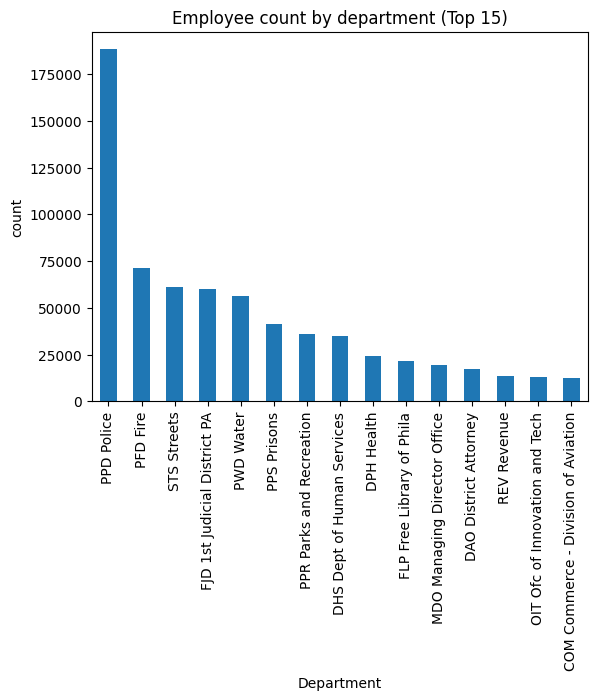

In [22]:
#Plot 1: Department Counts
if col_dept:
    plt.Figure()
    df[col_dept].value_counts().head(15).plot(kind="bar")
    plt.title("Employee count by department (Top 15)")
    plt.xlabel("Department")
    plt.ylabel("count")
    #save_fig("01_count_by_department.png")

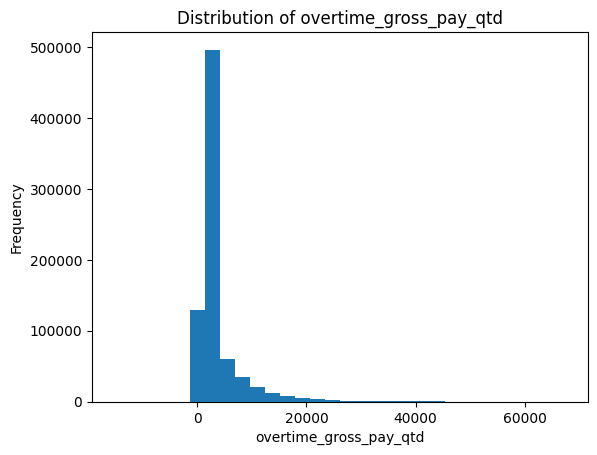

In [23]:
# Chart 2: Distribution of Total Earnings
if col_total_pay and df[col_total_pay].dtype.kind in "biufc":
    fig = plt.figure()
    df[col_total_pay].plot(kind="hist", bins=30)
    plt.title(f"Distribution of {col_total_pay}")
    plt.xlabel(col_total_pay)
    plt.ylabel("Frequency")

<Figure size 640x480 with 0 Axes>

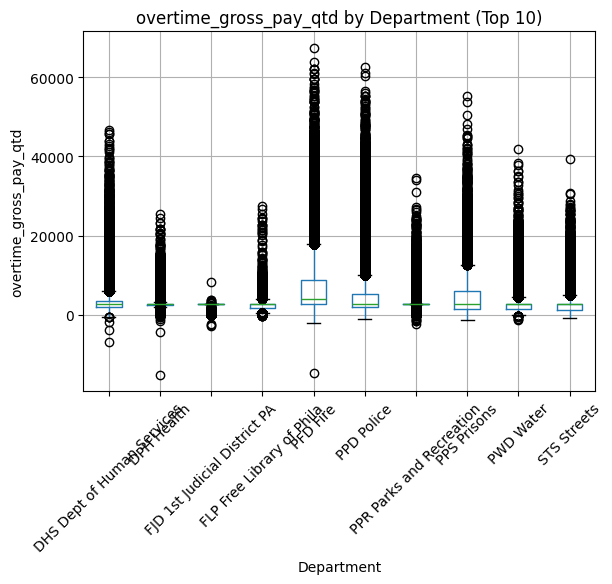

In [24]:
# Chart 3: Boxplot of Total Earnings by Department (Top 10 depts)
if col_total_pay and col_dept:
    top10 = df[col_dept].value_counts().head(10).index
    sub = df[df[col_dept].isin(top10)]
    fig = plt.figure()
    sub.boxplot(column=col_total_pay, by=col_dept, rot=45)
    plt.title(f"{col_total_pay} by Department (Top 10)")
    plt.suptitle("")
    plt.xlabel("Department")
    plt.ylabel(col_total_pay)

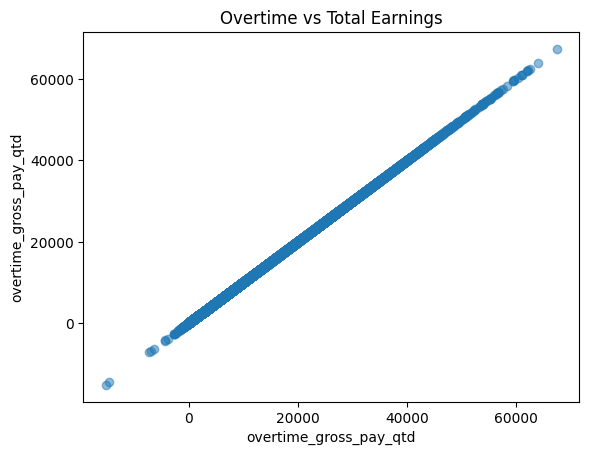

In [25]:
#Chart 4: Overtime vs Total

if col_overtime and col_total_pay:
    plt.Figure()
    plt.scatter(df[col_overtime], df[col_total_pay], alpha=0.5)
    plt.title("Overtime vs Total Earnings")
    plt.xlabel(col_overtime)
    plt.ylabel(col_total_pay)


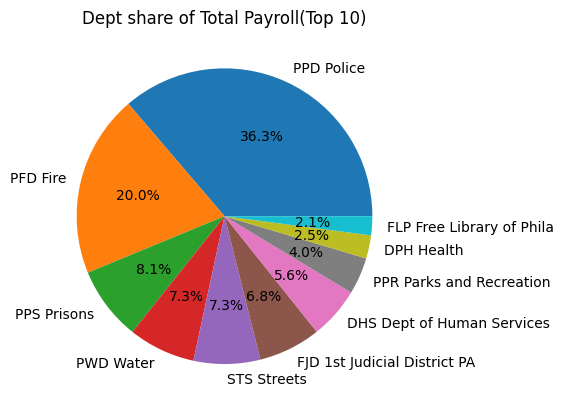

In [ ]:
#Chart 5: Pie by Dept Payroll

if col_dept and col_total_pay and df[col_total_pay].dtype.kind in "biufc":
    plt.figure()
    s = df.groupby(col_dept)[col_total_pay].sum().sort_values(ascending=False).head(10)
    plt.pie(s.values, labels=s.index, autopct="%1.1f%%")
    plt.title("Dept share of Total Payroll(Top 10)")
    

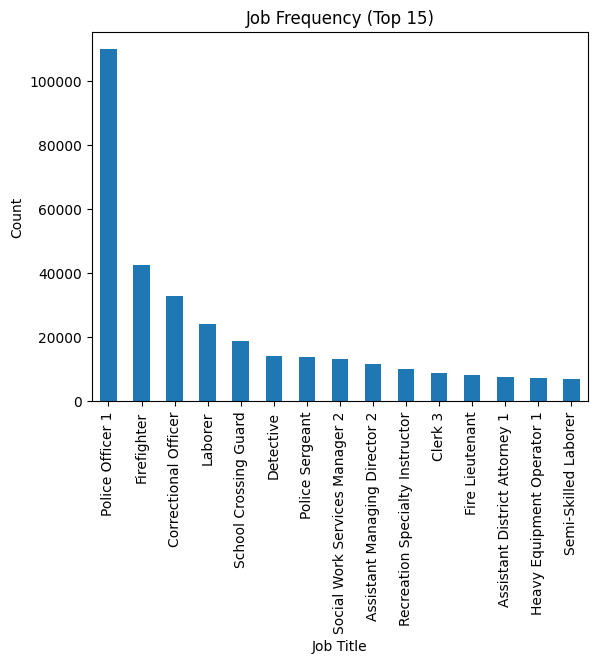

In [ ]:
#Chart 6: Job title Freq

if col_job:
    plt.Figure()
    df[col_job].value_counts().head(15).plot(kind="bar")
    plt.title("Job Frequency (Top 15)")
    plt.xlabel("Job Title")
    plt.ylabel("Count")

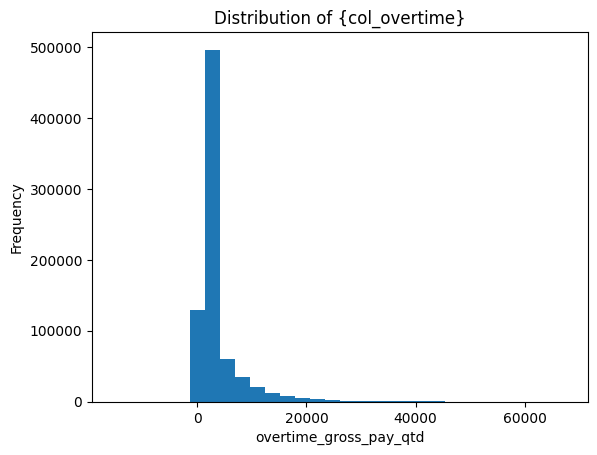

In [ ]:
# Chart 7: Histogram of overtime
if col_year and col_total_pay and df[col_total_pay].dtype.kind in "biufc":
    plt.figure()
    df[col_overtime].plot(kind="hist", bins=30)
    plt.title("Distribution of {col_overtime}")
    plt.xlabel(col_overtime)
    plt.ylabel("Frequency")
    

<Figure size 640x480 with 0 Axes>

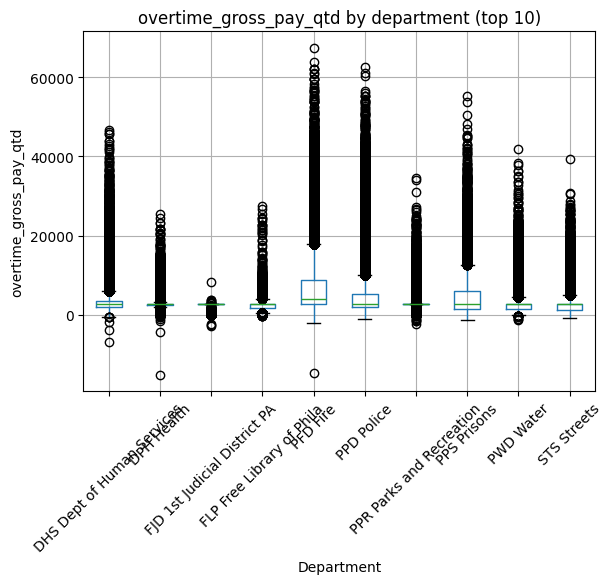

In [32]:
#Chart 8: Boxplot_Overtime by Dept
if col_overtime and col_dept and df[col_overtime].dtype.kind in "biufc":
    top10 = df[col_dept].value_counts().head(10).index
    sub = df[df[col_dept].isin(top10)]
    plt.figure()
    sub.boxplot(column=col_overtime, by=col_dept, rot=45)
    plt.title(f"{col_overtime} by department (top 10)")
    plt.suptitle("")
    plt.xlabel("Department")
    plt.ylabel(col_overtime)

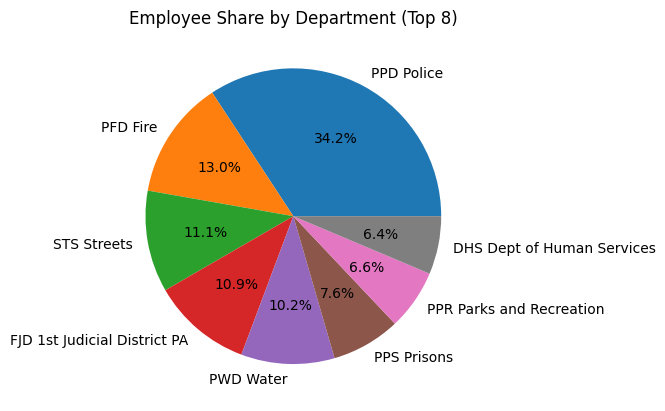

In [ ]:
#Chart 9: Department count pie chart (top 8)
if col_dept:
    plt.figure()
    dept_counts = df[col_dept].value_counts().head(8)
    plt.pie(dept_counts.values, labels=dept_counts.index, autopct="%1.1f%%")
    plt.title("Employee Share by Department (Top 8)")